In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.datasets import load_wine

from data.scripts.load_data import load_glass, load_diabets
import matplotlib.pyplot as plt

import pandas as pd

def accuracy(y_true, y_pred, average):
    return accuracy_score(y_true, y_pred)


def calculate_mean_and_deviation_from_scores(metrics, scores):
    return {metric: (np.mean(scores[metric]), np.var(scores[metric])) for metric in metrics}


def get_metrics_dict(metrics):
    return {metric: [] for metric in metrics}


def model_selection(data, target, model, metrics, splits):
    x, y = shuffle(data, target)
    scores = get_metrics_dict(metrics)

    for train_index, test_index in KFold(n_splits=splits).split(x):
        x_test, x_train, y_test, y_train = split_data_set(x, y, train_index, test_index)
        y_prediction = model.fit(x_train, y_train).predict(x_test)

        for metric in metrics:
            scores[metric].append(metric(y_test, y_prediction, average='macro'))

    return calculate_mean_and_deviation_from_scores(metrics, scores)


def binning_data_set():
    pass


def split_data_set(x, y, train_index, test_index):
    return x[test_index], x[train_index], y[test_index], y[train_index]

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/developers/Libraries/Python/envs/gpu/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 

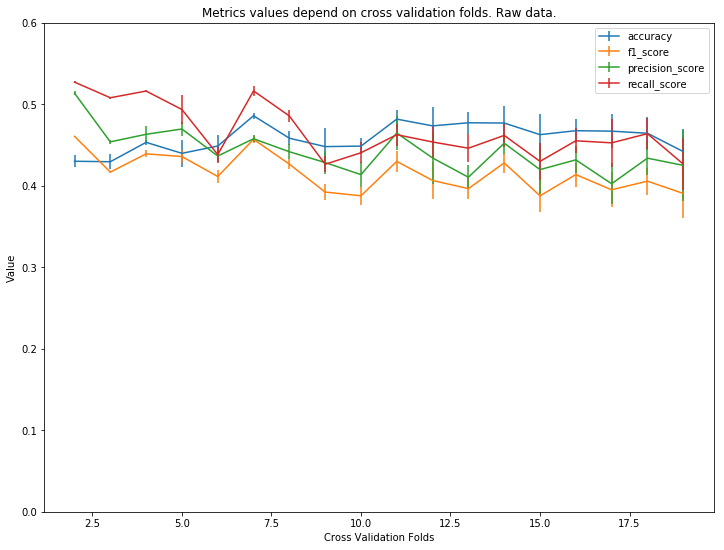

In [45]:
metrics = [accuracy, f1_score, precision_score, recall_score]
wine = load_wine()
glass = load_glass()
diabets = load_diabets()
model = GaussianNB()

data_set = glass
scores = []
folds = np.arange(2, 20)
for i in folds:
    scores.append(model_selection(data_set['data'], data_set['target'], model, metrics, i))

for metric in metrics:
    means = [score[metric][0] for score in scores]
    deviations = [score[metric][1] for score in scores]
    plt.errorbar(folds, means, deviations, label=metric.__name__)

    
plt.ylim((0.0, 0.6))
plt.title("Metrics values depend on cross validation folds. Raw data.")
plt.xlabel("Cross Validation Folds")
plt.ylabel("Value")
plt.legend()
plt.show()

In [46]:
tables = pd.DataFrame(columns=['{}-F'.format(k) for k in folds], index=['accuracy','f1_score','precission', 'recall'])

for k in folds:
    tables['{}-F'.format(k)] = pd.Series({'accuracy': make_value(scores[k-2][metrics[0]]),
                                          'f1_score': make_value(scores[k-2][metrics[1]]),
                                          'precission': make_value(scores[k-2][metrics[2]]),
                                          'recall': make_value(scores[k-2][metrics[3]])})

In [47]:
tables

,2-F,3-F,4-F,5-F,6-F,7-F,8-F,9-F,10-F,11-F,12-F,13-F,14-F,15-F,16-F,17-F,18-F,19-F
accuracy,0.4299 +/- 0.0071,0.4293 +/- 0.0092,0.4531 +/- 0.0032,0.4396 +/- 0.0163,0.4485 +/- 0.0132,0.4857 +/- 0.0038,0.4582 +/- 0.0085,0.4479 +/- 0.0234,0.4485 +/- 0.0094,0.4816 +/- 0.0116,0.4733 +/- 0.0233,0.4771 +/- 0.0132,0.4768 +/- 0.0205,0.4625 +/- 0.0252,0.4674 +/- 0.0147,0.4668 +/- 0.0209,0.4642 +/- 0.0205,0.4418 +/- 0.0276
f1_score,0.4604 +/- 0.0001,0.4166 +/- 0.0007,0.4390 +/- 0.0041,0.4357 +/- 0.0083,0.4112 +/- 0.0080,0.4568 +/- 0.0040,0.4263 +/- 0.0060,0.3921 +/- 0.0100,0.3875 +/- 0.0110,0.4297 +/- 0.0133,0.4063 +/- 0.0226,0.3963 +/- 0.0131,0.4279 +/- 0.0123,0.3875 +/- 0.0199,0.4136 +/- 0.0147,0.3949 +/- 0.0214,0.4055 +/- 0.0165,0.3904 +/- 0.0299
precission,0.5133 +/- 0.0027,0.4537 +/- 0.0028,0.4630 +/- 0.0106,0.4694 +/- 0.0090,0.4363 +/- 0.0073,0.4575 +/- 0.0042,0.4416 +/- 0.0094,0.4283 +/- 0.0140,0.4135 +/- 0.0156,0.4645 +/- 0.0211,0.4339 +/- 0.0319,0.4103 +/- 0.0145,0.4520 +/- 0.0129,0.4196 +/- 0.0295,0.4316 +/- 0.0165,0.4023 +/- 0.0250,0.4337 +/- 0.0209,0.4249 +/- 0.0438
recall,0.5270 +/- 0.0008,0.5078 +/- 0.0010,0.5160 +/- 0.0008,0.4933 +/- 0.0177,0.4381 +/- 0.0102,0.5162 +/- 0.0057,0.4854 +/- 0.0077,0.4262 +/- 0.0098,0.4403 +/- 0.0129,0.4625 +/- 0.0133,0.4535 +/- 0.0209,0.4459 +/- 0.0169,0.4616 +/- 0.0143,0.4298 +/- 0.0230,0.4550 +/- 0.0155,0.4525 +/- 0.0292,0.4637 +/- 0.0187,0.4264 +/- 0.0320
